In [20]:
from keras.layers import *
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [3]:
model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu',input_shape =(28,28,1)))
model.add(MaxPool2D((2,2),strides = (2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2),strides = (2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [6]:
def process_data(X,y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    y = to_categorical(y)
    return X,y

In [7]:
X_train,y_train = process_data(X_train,y_train)
X_test,y_test = process_data(X_test,y_test)

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [9]:
history = model.fit(x=X_train,y=y_train,epochs=20,batch_size=128,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 36s 674us/step - loss: 0.2648 - accuracy: 0.9194 - val_loss: 0.0635 - val_accuracy: 0.9807
Epoch 2/20
54000/54000 [==============================] - 33s 604us/step - loss: 0.0678 - accuracy: 0.9789 - val_loss: 0.0496 - val_accuracy: 0.9868
Epoch 3/20
54000/54000 [==============================] - 40s 732us/step - loss: 0.0454 - accuracy: 0.9856 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 4/20
54000/54000 [==============================] - 33s 609us/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0424 - val_accuracy: 0.9882
Epoch 5/20
54000/54000 [==============================] - 33s 602us/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0355 - val_accuracy: 0.9893
Epoch 6/20
54000/54000 [==============================] - 35s 646us/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0333 - val_accuracy: 0.9923
Epoch 7/20
54000/54000 [==============================] -

In [10]:
loss,accuracy = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 161us/step


In [11]:
print("Accuracy = ",accuracy*100)
print("Loss = ",loss)

Accuracy =  98.83999824523926
Loss =  0.046864404607325785


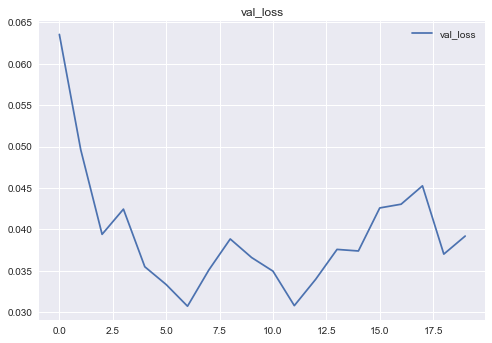

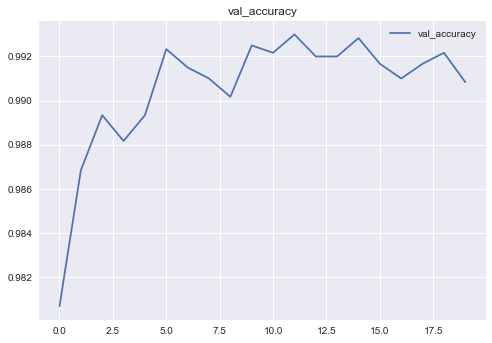

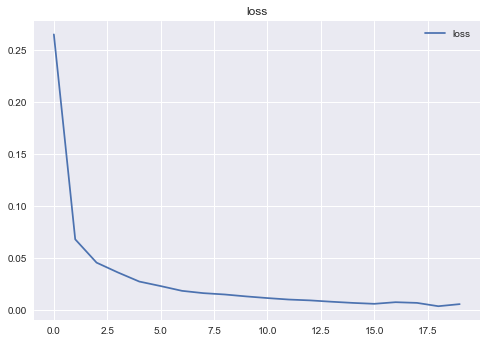

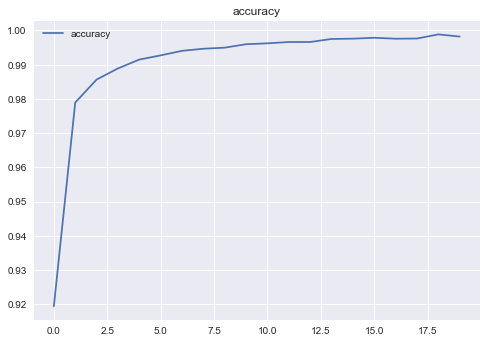

In [21]:
for key,value in (history.history).items():
    plt.plot(value,label=key)
    plt.title(key)
    plt.legend()
    plt.show()

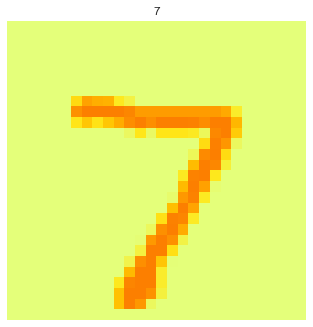

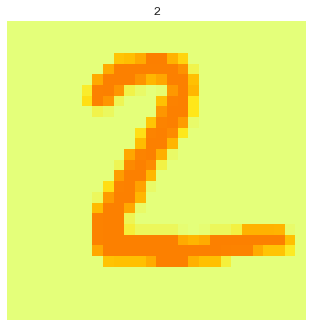

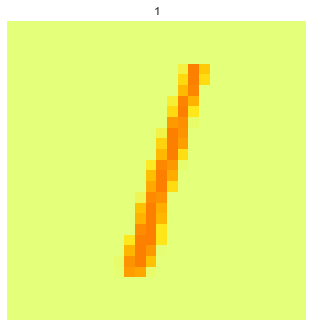

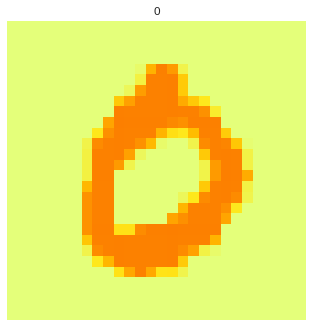

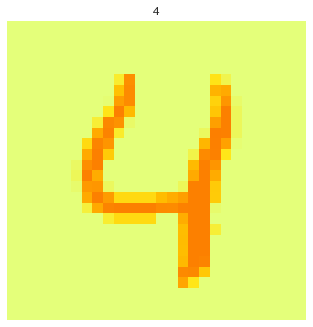

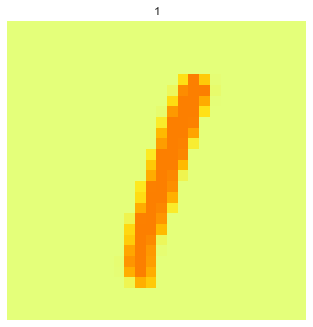

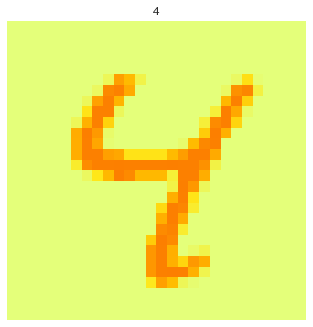

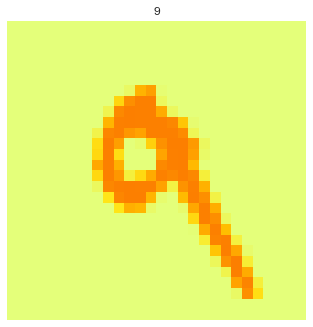

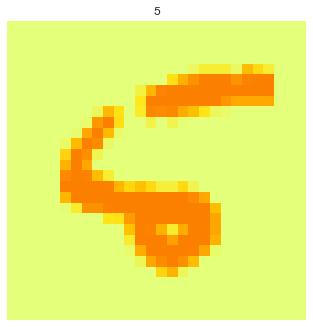

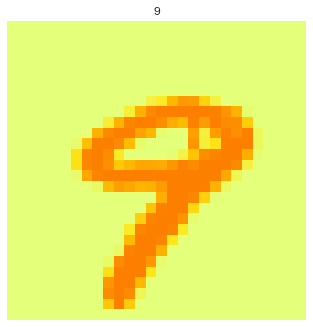

In [22]:
y_pred = model.predict(X_test[:10])
for i in range(len(y_pred)):
    plt.imshow(X_test[i].reshape(28,28),cmap=plt.cm.Wistia)
    plt.title(np.argmax(y_pred[i]))
    plt.axis('off')
    plt.show()

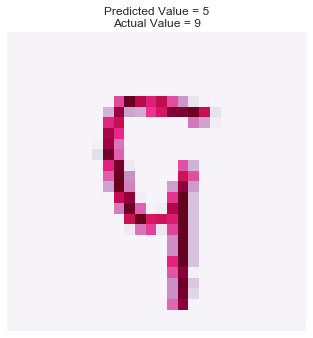

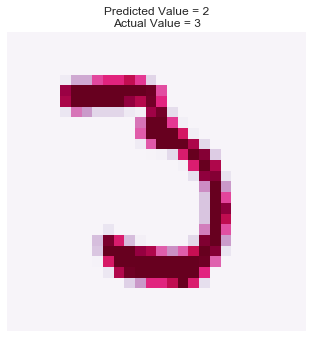

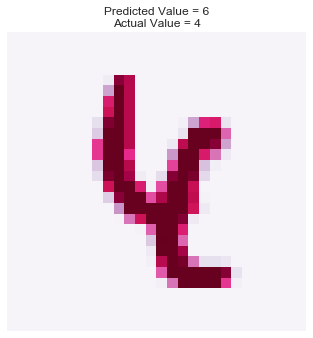

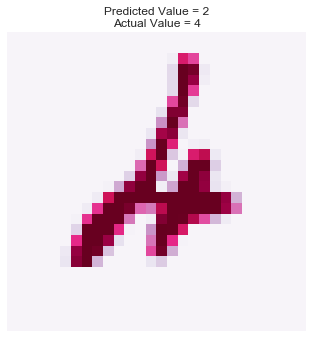

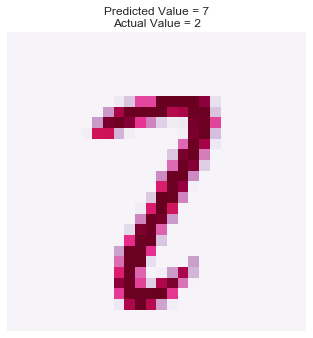

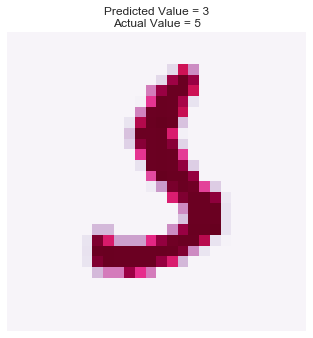

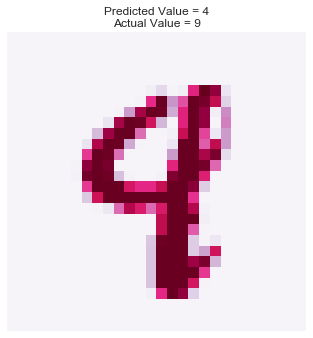

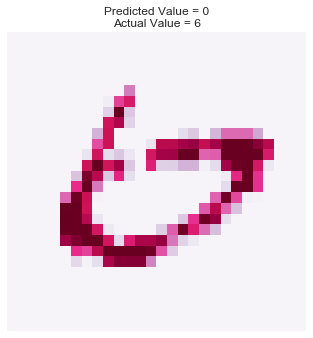

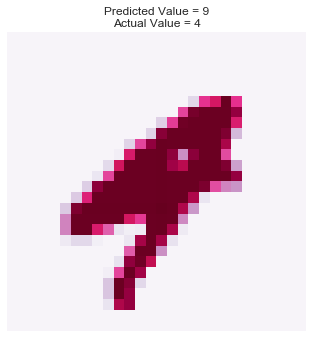

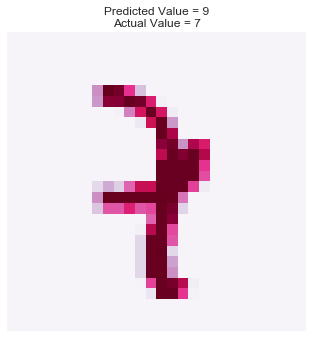

In [23]:
y_pred = model.predict(X_test)
k=0
for i in range(len(y_pred)):
    if np.argmax(y_pred[i])!=np.argmax(y_test[i]):
        plt.imshow(X_test[i].reshape(28,28),cmap = plt.cm.PuRd)
        plt.title("Predicted Value = "+str(np.argmax(y_pred[i]))+"\nActual Value = "+str(np.argmax(y_test[i])))
        plt.axis('off')
        plt.show()
        k+=1
    if k==10:
        break